In [5]:
import pandas as pd
import numpy as np

In [6]:
dep=pd.read_csv(r"C:\Users\mahab\Downloads\Telegram Desktop\departments.csv")
dep

,Department_ID,Department_Name,Location
0,1,IT,New York
1,2,HR,San Francisco
2,3,Finance,Chicago
3,4,Marketing,Los Angeles
4,5,Operations,Seattle


In [8]:
emp=pd.read_csv(r"C:\Users\mahab\Downloads\Telegram Desktop\employees.csv")
emp

,Employee_ID,Name,Department_ID,Salary
0,101,Alice Brown,1.0,60000
1,102,Bob Smith,2.0,45000
2,103,Charlie Doe,1.0,75000
3,104,Daisy Evans,3.0,50000
4,105,Eva Taylor,4.0,80000
5,106,Frank Wilson,NaN,40000


In [9]:
# Inner Join: Perform an inner join between the employees and departments datasets
# to get information about employees along with their department names and locations.
inner_join=pd.merge(emp,dep,on=['Department_ID'],how="inner")
inner_join

,Employee_ID,Name,Department_ID,Salary,Department_Name,Location
0,101,Alice Brown,1.0,60000,IT,New York
1,103,Charlie Doe,1.0,75000,IT,New York
2,102,Bob Smith,2.0,45000,HR,San Francisco
3,104,Daisy Evans,3.0,50000,Finance,Chicago
4,105,Eva Taylor,4.0,80000,Marketing,Los Angeles


In [10]:
#Left Join: Perform a left join between the employees and departments dat
left_join=pd.merge(emp,dep,on=['Department_ID'],how="left")
left_join

,Employee_ID,Name,Department_ID,Salary,Department_Name,Location
0,101,Alice Brown,1.0,60000,IT,New York
1,102,Bob Smith,2.0,45000,HR,San Francisco
2,103,Charlie Doe,1.0,75000,IT,New York
3,104,Daisy Evans,3.0,50000,Finance,Chicago
4,105,Eva Taylor,4.0,80000,Marketing,Los Angeles
5,106,Frank Wilson,NaN,40000,NaN,NaN


In [11]:
# Right Join: Perform a right join between the departments and employees datase
right_join=pd.merge(dep,emp,on=['Department_ID'],how="right")
right_join

,Department_ID,Department_Name,Location,Employee_ID,Name,Salary
0,1.0,IT,New York,101,Alice Brown,60000
1,2.0,HR,San Francisco,102,Bob Smith,45000
2,1.0,IT,New York,103,Charlie Doe,75000
3,3.0,Finance,Chicago,104,Daisy Evans,50000
4,4.0,Marketing,Los Angeles,105,Eva Taylor,80000
5,NaN,NaN,NaN,106,Frank Wilson,40000


In [12]:
#Full Outer Join: Perform a full outer join between the employees and departments datasets. 
outter_join=pd.merge(emp,dep,on=['Department_ID'],how="outer")
outter_join

,Employee_ID,Name,Department_ID,Salary,Department_Name,Location
0,101.0,Alice Brown,1.0,60000.0,IT,New York
1,103.0,Charlie Doe,1.0,75000.0,IT,New York
2,102.0,Bob Smith,2.0,45000.0,HR,San Francisco
3,104.0,Daisy Evans,3.0,50000.0,Finance,Chicago
4,105.0,Eva Taylor,4.0,80000.0,Marketing,Los Angeles
5,106.0,Frank Wilson,NaN,40000.0,NaN,NaN
6,NaN,NaN,5.0,NaN,Operations,Seattle


In [15]:
#

 ## group by

Group Employees by Department:
 Group the employees dataset by Department_ID and calculate:
i) Total salary in each department.
ii) Average salary in each department.


In [13]:
group_by_department = emp.groupby("Department_ID").agg(
    Total_Salary=("Salary", "sum"),
    Average_Salary=("Salary", "mean")
).reset_index()
print("\nGroup Employees by Department:")
print(group_by_department)


Group Employees by Department:
   Department_ID  Total_Salary  Average_Salary
0            1.0        135000         67500.0
1            2.0         45000         45000.0
2            3.0         50000         50000.0
3            4.0         80000         80000.0


Group Departments by Location:
 Join the datasets and group by Location to find:
i) The number of employees in each location.
ii) Total salary of employees in each location

In [14]:
jp=pd.merge(emp,dep,on=['Department_ID'],how="inner")
jp

,Employee_ID,Name,Department_ID,Salary,Department_Name,Location
0,101,Alice Brown,1.0,60000,IT,New York
1,103,Charlie Doe,1.0,75000,IT,New York
2,102,Bob Smith,2.0,45000,HR,San Francisco
3,104,Daisy Evans,3.0,50000,Finance,Chicago
4,105,Eva Taylor,4.0,80000,Marketing,Los Angeles


In [15]:
group_by_location=jp.groupby("Location").agg(employee_count=("Employee_ID","count"),
          total_salary=("Salary","sum")).reset_index()
print("Group Deparment by location :")
print(group_by_location)

Group Deparment by location :
        Location  employee_count  total_salary
0        Chicago               1         50000
1    Los Angeles               1         80000
2       New York               2        135000
3  San Francisco               1         45000


#Filter employees with a salary above $50,000 and group them by
#Department_ID. Calculate the average salary for these employees in each department.

In [47]:
filter_emp=emp[emp["Salary"]>50000]
group_filter=filter_emp.groupby("Department_ID").agg(average_salary=("Salary","mean")).reset_index()
print("filter and group :")
print(group_filter)

filter and group :
   Department_ID  average_salary
0            1.0         67500.0
1            4.0         80000.0


# univariate data analysis

In [16]:
titanic=pd.read_csv(r"C:\Users\mahab\Downloads\Telegram Desktop\titanic_dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# numerical continuous columns [Age,Fare]

In [17]:
print("the mean of titanic data : ",titanic[["Age"]].mean())
print("the min of titanic data : ",titanic["Age"].min())
print("the max of titanic data : ",titanic["Age"].max())
print("the meadiano of titanic data : ",titanic["Age"].median())
print("the stardand deviation of titanic data : ",titanic["Age"].std())

the mean of titanic data :  Age    30.27259
dtype: float64
the min of titanic data :  0.17
the max of titanic data :  76.0
the meadiano of titanic data :  27.0
the stardand deviation of titanic data :  14.18120923562442


In [18]:
print("the mean of titanic data : ",titanic["Fare"].mean())
print("the min of titanic data : ",titanic["Fare"].min())
print("the max of titanic data : ",titanic["Fare"].max())
print("the meadian of titanic data : ",titanic["Fare"].median())
print("the stardand deviation of titanic data : ",titanic["Fare"].std())

the mean of titanic data :  35.627188489208635
the min of titanic data :  0.0
the max of titanic data :  512.3292
the meadian of titanic data :  14.4542
the stardand deviation of titanic data :  55.90757617997383


# For each numerical continuous column- Find themean,median,standard deviation,minimum andmaximum value. Draw histogram,kde plot andboxplot using pandas only.

<Axes: ylabel='Frequency'>

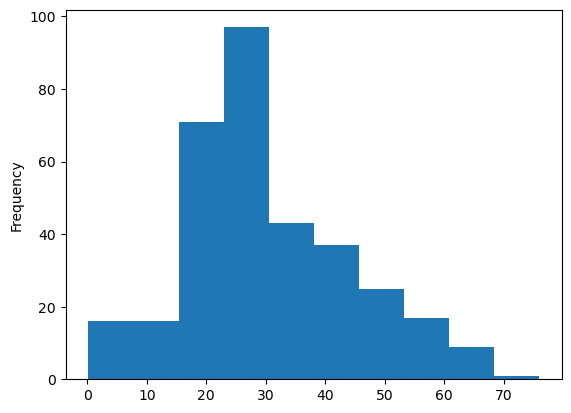

In [58]:
titanic["Age"].plot(kind="hist")

<Axes: ylabel='Density'>

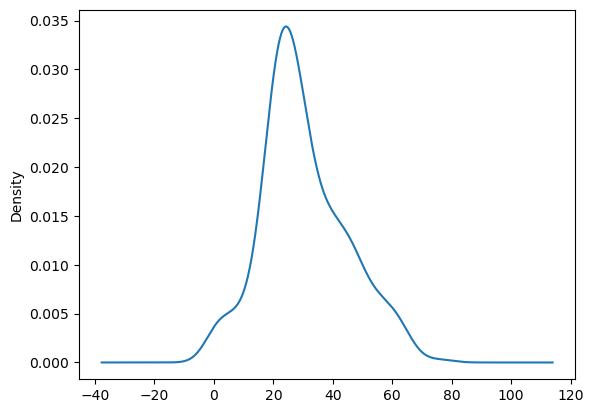

In [60]:
titanic["Age"].plot(kind="kde")

<Axes: >

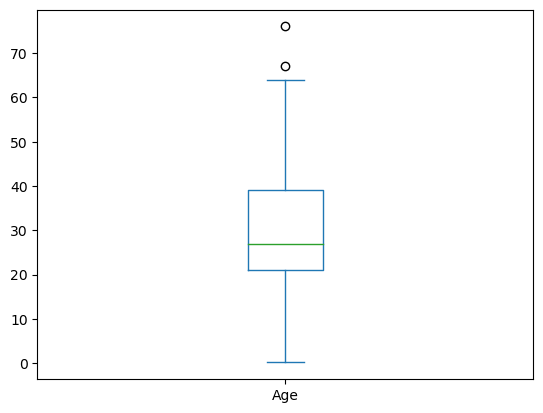

In [24]:
titanic["Age"].plot(kind="box")

<Axes: ylabel='Frequency'>

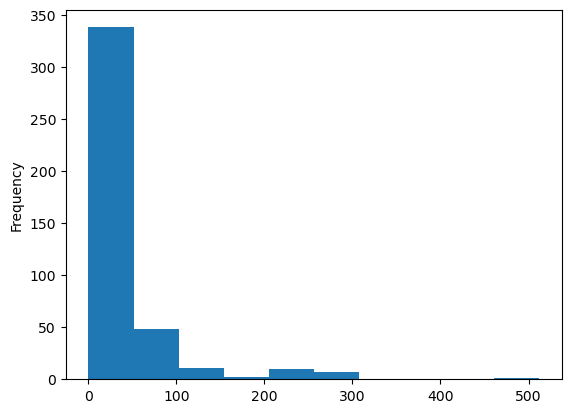

In [25]:
titanic["Fare"].plot(kind="hist")

<Axes: ylabel='Density'>

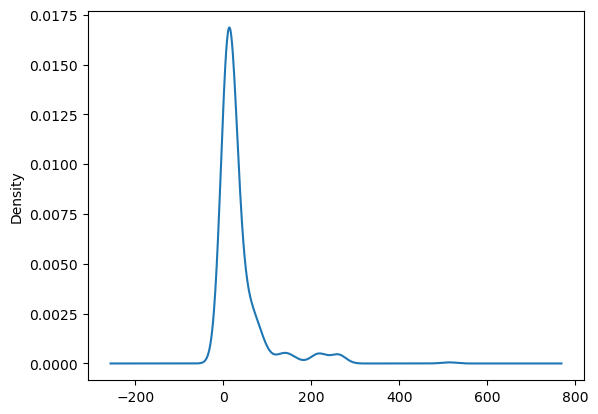

In [26]:
titanic["Fare"].plot(kind="kde")

<Axes: >

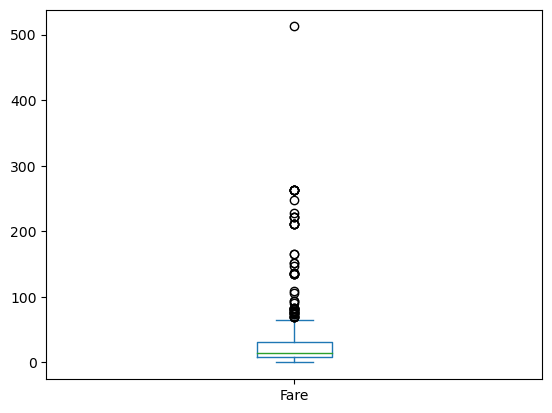

In [27]:
titanic["Fare"].plot(kind="box")

# # For discrete columns find the number of uniquevalues,unique values and value_counts. Draw barplot and pie chart using pandas only.

#  Discrete Columns [Survived, Pclass, Sex, SibSp, Parch, Embarked]

the unique values pesent in titanic data : [0 1 3 2 4 6 5 9]
the  number of unique values pesent in titanic data : 8
the count of each value present in titanic data :  0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64
Axes(0.125,0.11;0.775x0.77)


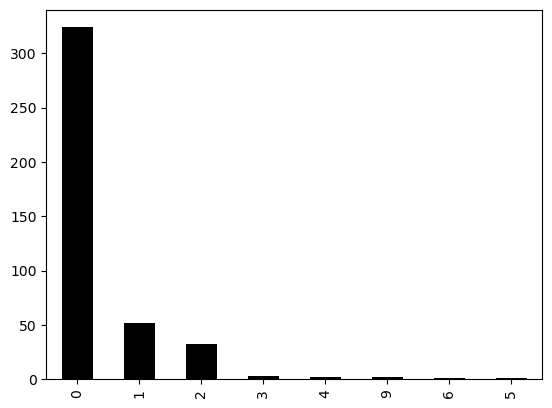

In [52]:
print("the unique values pesent in titanic data :",titanic["Parch"].unique())
print("the  number of unique values pesent in titanic data :",titanic["Parch"].nunique())
print("the count of each value present in titanic data : ",titanic["Parch"].value_counts())
print(titanic["Parch"].value_counts().plot(kind="bar",color="black"))


Axes(0.22375,0.11;0.5775x0.77)


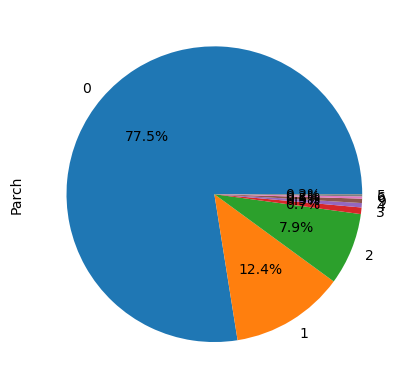

In [51]:
print(titanic["Parch"].value_counts().plot(kind="pie",autopct="%0.1f%%"))

the unique values pesent in titanic data : [3 2 1]
the  number of unique values pesent in titanic data : 3
the count of each value present in titanic data :  3    218
1    107
2     93
Name: Pclass, dtype: int64
Axes(0.125,0.11;0.775x0.77)


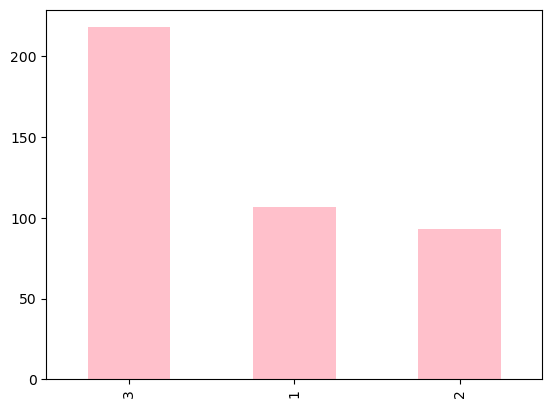

In [53]:
print("the unique values pesent in titanic data :",titanic["Pclass"].unique())
print("the  number of unique values pesent in titanic data :",titanic["Pclass"].nunique())
print("the count of each value present in titanic data : ",titanic["Pclass"].value_counts())
print(titanic["Pclass"].value_counts().plot(kind="bar",color="pink"))


Axes(0.22375,0.11;0.5775x0.77)


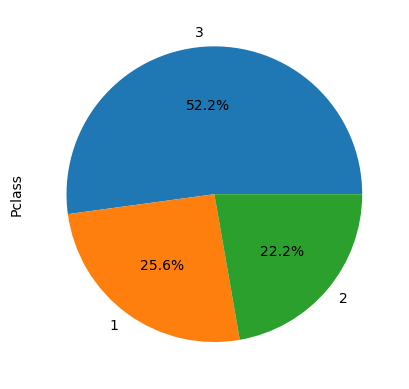

In [49]:
print(titanic["Pclass"].value_counts().plot(kind="pie",autopct="%0.1f%%"))

the unique values pesent in titanic data : [0 1 2 3 4 5 8]
the  number of unique values pesent in titanic data : 7
the count of each value present in titanic data :  0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64
Axes(0.125,0.11;0.775x0.77)


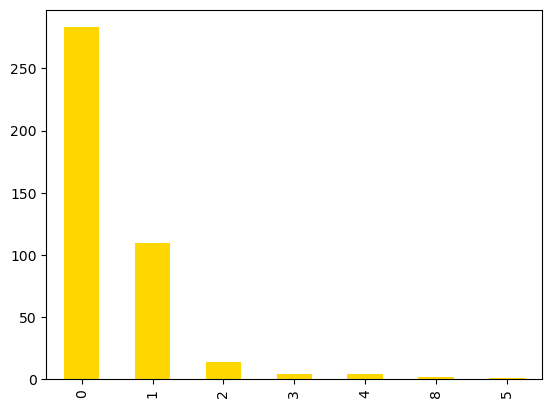

In [56]:
print("the unique values pesent in titanic data :",titanic["SibSp"].unique())
print("the  number of unique values pesent in titanic data :",titanic["SibSp"].nunique())
print("the count of each value present in titanic data : ",titanic["SibSp"].value_counts())
print(titanic["SibSp"].value_counts().plot(kind="bar",color="gold"))


<Axes: ylabel='SibSp'>

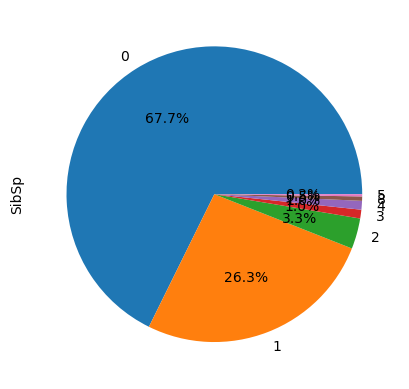

In [44]:
titanic["SibSp"].value_counts().plot(kind=("pie"),autopct="%0.1f%%")

the unique values pesent in titanic data : ['male' 'female']
the  number of unique values pesent in titanic data : 2
the count of each value present in titanic data :  male      266
female    152
Name: Sex, dtype: int64
Axes(0.125,0.11;0.775x0.77)


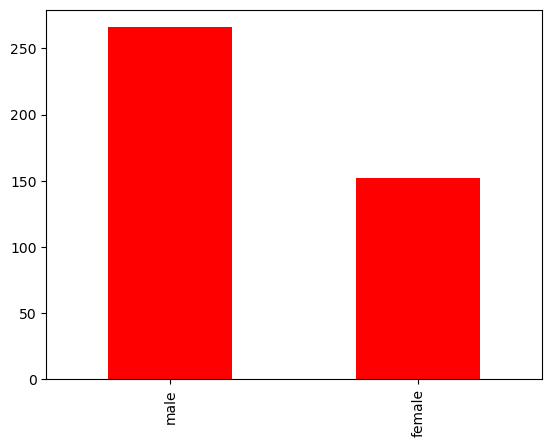

In [38]:
print("the unique values pesent in titanic data :",titanic["Sex"].unique())
print("the  number of unique values pesent in titanic data :",titanic["Sex"].nunique())
print("the count of each value present in titanic data : ",titanic["Sex"].value_counts())
print(titanic["Sex"].value_counts().plot(kind="bar",color="red"))


Axes(0.22375,0.11;0.5775x0.77)


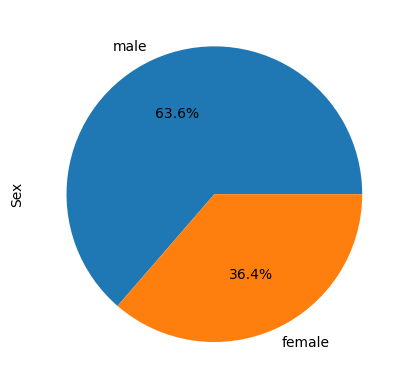

In [40]:
print(titanic["Sex"].value_counts().plot(kind="pie",autopct="%0.1f%%"))

the unique values pesent in titanic data : ['Q' 'S' 'C']
the  number of unique values pesent in titanic data : 3
the count of each value present in titanic data :  S    270
C    102
Q     46
Name: Embarked, dtype: int64
Axes(0.125,0.11;0.775x0.77)


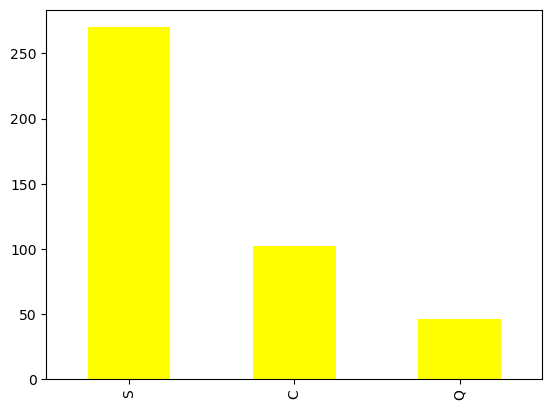

In [36]:
print("the unique values pesent in titanic data :",titanic["Embarked"].unique())
print("the  number of unique values pesent in titanic data :",titanic["Embarked"].nunique())
print("the count of each value present in titanic data : ",titanic["Embarked"].value_counts())
print(titanic["Embarked"].value_counts().plot(kind="bar",color="yellow"))

<Axes: ylabel='Embarked'>

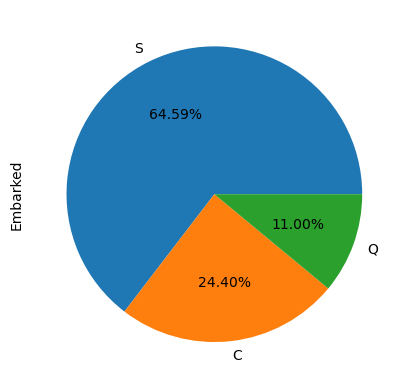

In [93]:
titanic["Embarked"].value_counts().plot(kind="pie",autopct="%0.2f%%")

the unique values pesent in titanic data : [0 1]
the  number of unique values pesent in titanic data : 2
the count of each value present in titanic data :  0    266
1    152
Name: Survived, dtype: int64
Axes(0.125,0.11;0.775x0.77)


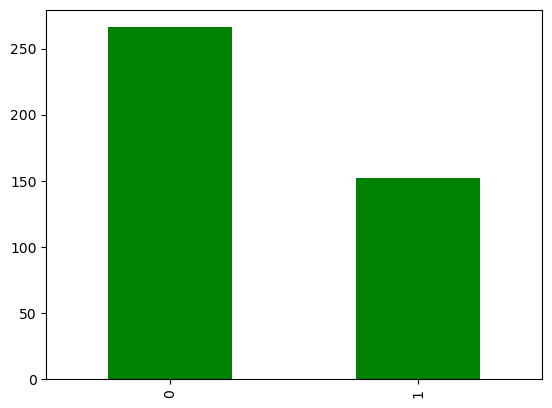

In [55]:
print("the unique values pesent in titanic data :",titanic["Survived"].unique())
print("the  number of unique values pesent in titanic data :",titanic["Survived"].nunique())
print("the count of each value present in titanic data : ",titanic["Survived"].value_counts())
print(titanic["Survived"].value_counts().plot(kind="bar",color="green"))

Axes(0.22375,0.11;0.5775x0.77)


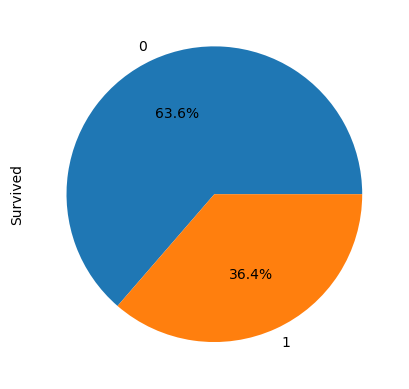

In [118]:
print(titanic["Survived"].value_counts().plot(kind="pie",autopct="%1.1f%%"))